In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [3]:
from nltk.corpus import stopwords

import string

In [14]:
import pickle

In [4]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [5]:
df = pd.read_csv('modeling_2.csv', index_col = 'Unnamed: 0')

# Basline Models with TF-IDF

In [6]:
X = df['review']
y = df['num_rating']

## TF-IDF

In [7]:
def tfidf(X, y,  stopwords_list): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    vec = TfidfVectorizer(stop_words=stopwords_list)
    
    tf_idf_train = vec.fit_transform(X_train)
    tf_idf_test = vec.transform(X_test)
    
    return tf_idf_train, tf_idf_test, y_train, y_test, vec


In [8]:
basic_stopwords_list = stopwords.words('english')+ list(string.punctuation)+ list(string.digits)

In [9]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic, vec_basic = tfidf(X, y,  basic_stopwords_list)

## Basic Classification

In [10]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test 
#and train predictiions
def classify_text(classifier, X_train, X_test, y_train, y_test):
    '''
    Train a classifier to identify 
    
    '''
    #fit the classifier with our training data
    classifier.fit(X_train, y_train)
    
    #predict the labels of our train data and store them in train_preds
    train_preds = classifier.predict(X_train)

    #predict the labels of our test data and store them in test_preds
    test_preds = classifier.predict(X_test)
    
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Testing accuracy: ', accuracy_score(y_test, test_preds))
    
    cm_nb = confusion_matrix(y_test, test_preds)
    plt.figure(figsize = (6, 6))
    plt.title(classifier)
    
    return sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"), plt.xlabel('Predicted Label'),plt.ylabel('True Label')


### Random Forest

In [11]:
rf_basic = RandomForestClassifier(n_estimators=50)

Training accuracy:  1.0
Testing accuracy:  0.4805194805194805


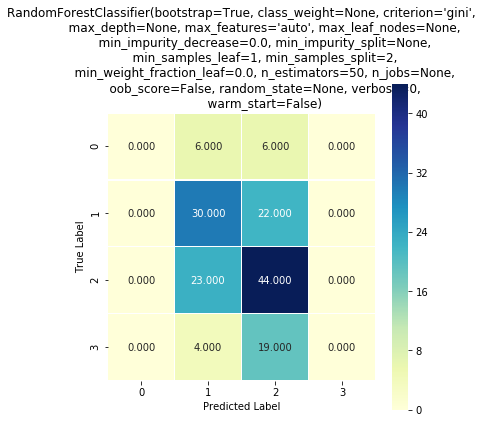

In [12]:
classify_text(rf_basic, X_train_basic, X_test_basic, y_train_basic, y_test_basic);

# Classification Models

## Creating interactions

In [20]:
 #Interactions with reviewer and Afinn Avg Polarity
df['x0_Frank Bruni_X_af_avg_pol'] = df['x0_Frank Bruni'] * df['af_avg_pol']
df['x0_Sam Sifton_X_af_avg_pol'] = df['x0_Sam Sifton'] * df['af_avg_pol']
df['x0_Pete Wells_X_af_avg_pol'] = df['x0_Pete Wells'] * df['af_avg_pol']

 #Interactions with 'vocabulary'
df['x0_Frank Bruni_X_vocab'] = df['x0_Frank Bruni'] * df['vocabulary']
df['x0_Sam Sifton_X_vocab'] = df['x0_Sam Sifton'] * df['vocabulary']
df['x0_Pete Wells_X_vocab'] = df['x0_Pete Wells'] * df['vocabulary']

In [21]:
modeling_df = df.drop(['name', 'rating', 'review_date', 'reviewer', 'review_url',
       'neighborhood', 'review', 'headline', 'tokens', 'area','af_min_pol', 'af_max_pol'], axis=1).copy()

In [22]:
X_m = modeling_df.drop('num_rating', axis=1)
y_m = modeling_df['num_rating']

In [23]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)


## Scaling

In [73]:
mms = MinMaxScaler()

X_train_mms = mms.fit_transform(X_train_m)
X_test_mms = mms.transform(X_test_m)

In [25]:
mms = pickle.load( open("min_max_scale.pkl", "rb"))

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [26]:
#Use this if importing mms from pickle
X_train_mms = mms.transform(X_train_m)
X_test_mms = mms.transform(X_test_m)

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [15]:
gs_rfc = pickle.load( open("RFC.pkl", "rb"))

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.21.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when usin

In [100]:
rfcm = RandomForestClassifier()

In [113]:
params_rfc = dict(n_estimators=[80,82,85,87,89,90],max_depth=[3,5,7,9],min_samples_leaf=[.008,.01,.018,.02])

gs_rfc = GridSearchCV(rfcm, params_rfc, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

gs_rfc.fit(X_train_mms, y_train_m)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   14.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [28]:
gs_rfc.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.01, 'n_estimators': 80}

In [29]:
pred_train_rfc = gs_rfc.best_estimator_.predict(X_train_mms)
pred_test_rfc = gs_rfc.best_estimator_.predict(X_test_mms)

In [30]:
print('Accuracy train: ', accuracy_score(y_train_m, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test_m, pred_test_rfc))

Accuracy train:  0.5182926829268293
Accuracy test:  0.5528455284552846


In [17]:
gs_rfc.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.01, 'n_estimators': 80}

Text(42.0, 0.5, 'True Label')

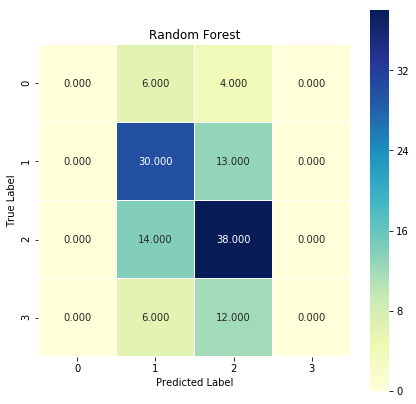

In [31]:
cm_rfc = confusion_matrix(y_test_m, pred_test_rfc)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')